In [1]:
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt

import discretizers as disc
from agents import SARSA, QLearning

# Vanila

<AxesSubplot: >

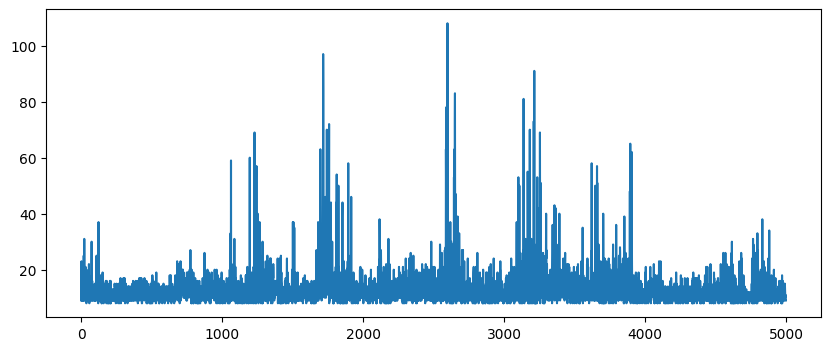

In [2]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

sarsa = SARSA(env)
sarsa.train(episodes=5000)
sarsa.plot()

In [8]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

q = QLearning(env)
q.train(episodes=5000)
q.plot()

<AxesSubplot: >

# Teste Discretização

<AxesSubplot: >

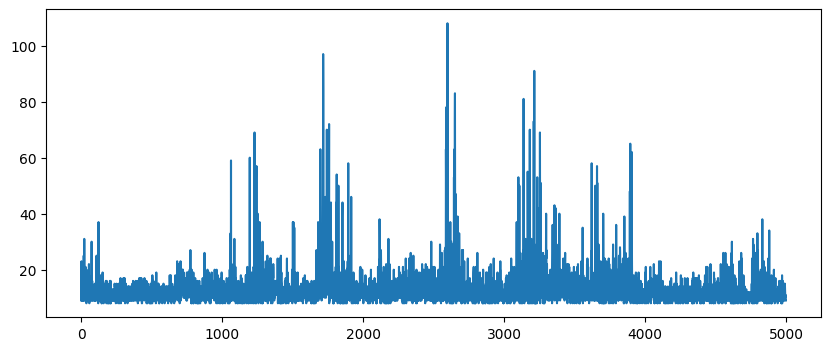

In [ ]:
env = gym.make("CartPole-v1")

sarsa = SARSA(env)
sarsa.train(episodes=5000)
sarsa.plot()

<AxesSubplot: >

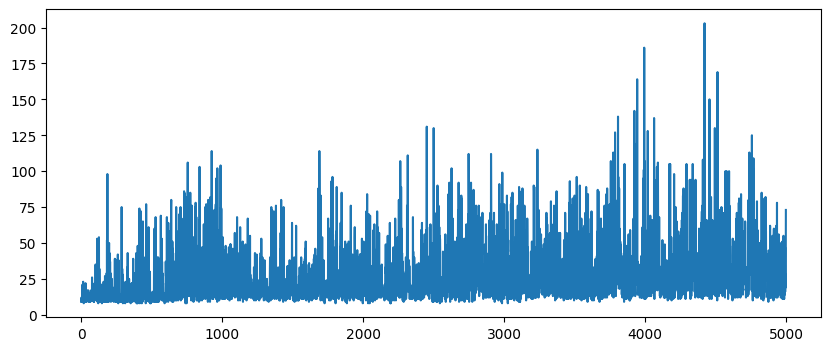

In [ ]:
env = gym.make("CartPole-v1")

sarsa = SARSA(env, state_shape=(10, 10, 10, 10), discretizer=disc.simple_discretized_state)
sarsa.train(episodes=5000)
sarsa.plot()

<AxesSubplot: >

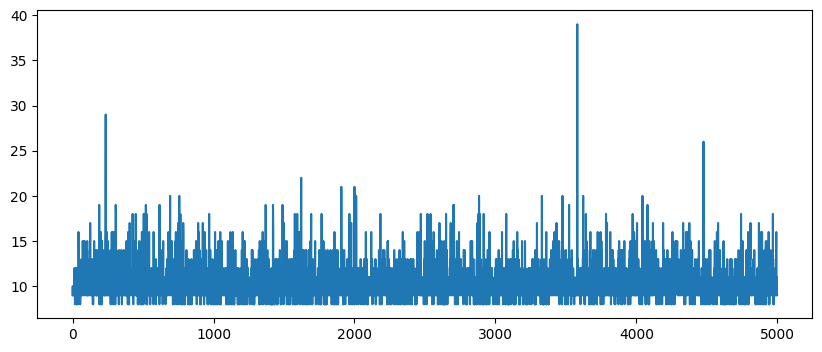

In [ ]:
env = gym.make("CartPole-v1")

sarsa = SARSA(env, state_shape=(10, 10, 50, 50), discretizer=disc.discretize_state_scaler)
sarsa.train(episodes=5000)
sarsa.plot()

<AxesSubplot: >

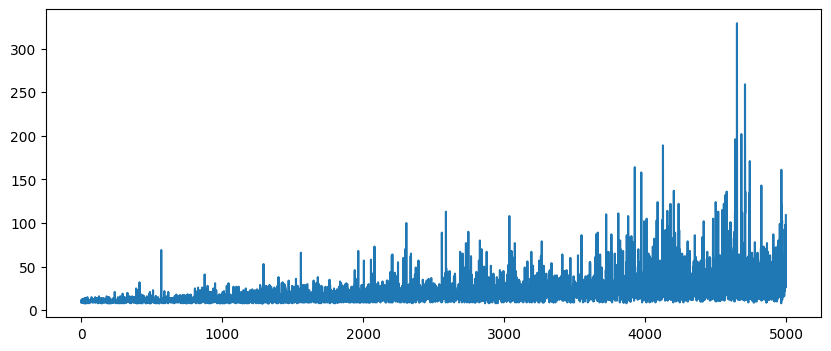

In [ ]:
env = gym.make("CartPole-v1")

sarsa = SARSA(env, state_shape=(30, 30, 50, 50), discretizer=disc.discretize_state_normalized)
sarsa.train(episodes=5000)
sarsa.plot()

<AxesSubplot: >

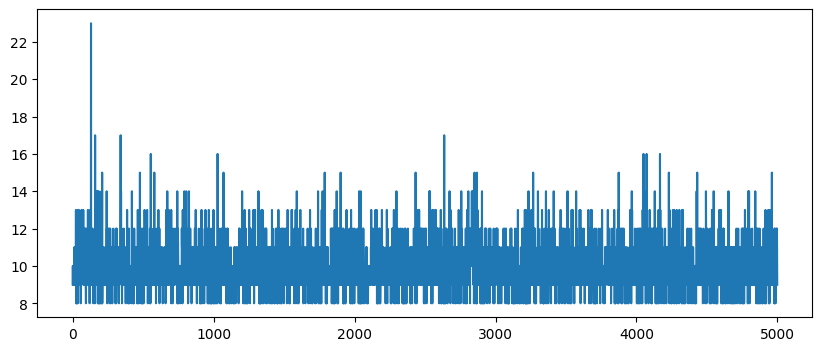

In [ ]:
env = gym.make("CartPole-v1")

sarsa = SARSA(env, state_shape=(30, 30, 50, 50), discretizer=disc.discretize_state_min_max)
sarsa.train(episodes=5000)
sarsa.plot()

<AxesSubplot: >

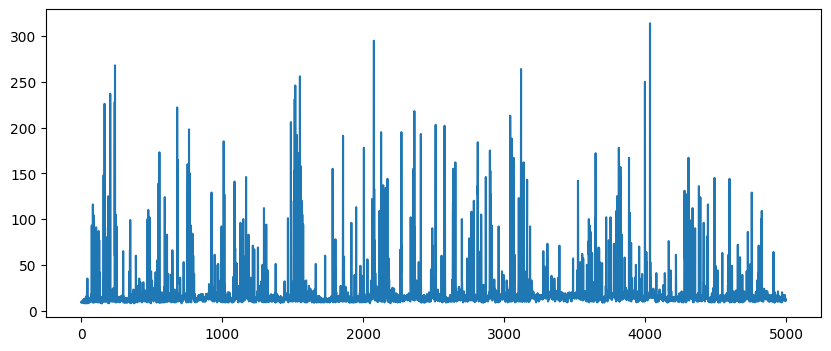

In [ ]:
env = gym.make("CartPole-v1")

sarsa = SARSA(env, state_shape=(6, 12), discretizer=disc.discretize_state_croped)
sarsa.train(episodes=5000)
sarsa.plot()

<AxesSubplot: >

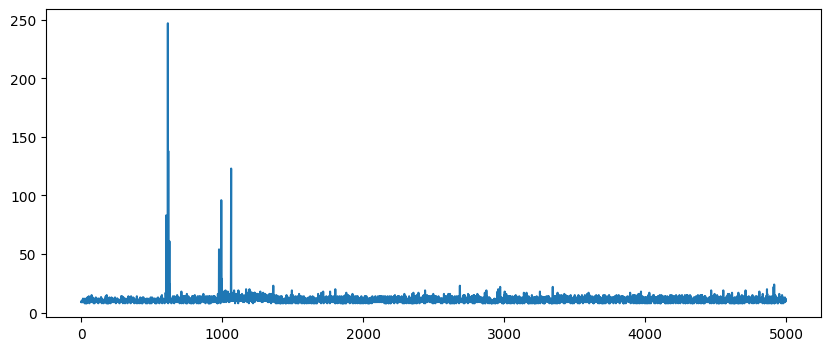

In [ ]:
env = gym.make("CartPole-v1")

q = QLearning(env, state_shape=(6, 12), discretizer=disc.discretize_state_croped)
q.train(episodes=5000)
q.plot()

# Média

In [ ]:
agents = [SARSA(gym.make("CartPole-v1"), seed=i) for i in range(5)]

df = pd.DataFrame(data={'model':[], 'episode':[], 'step':[], 'S':[], 'A':[], 'R':[]})
for agent in zip(*[agent.step() for agent in agents]):
    for i, (e,step, s, a, r) in enumerate(agent):
        new_row = pd.Series({'model':i, 'episode':e, 'step':step, 'S':s, 'A':a, 'R':r}).to_frame().T
        df = pd.concat([df, new_row], ignore_index=True)

In [ ]:
grouped = df[['model', 'episode', 'R']].groupby(['model', 'episode']).sum().reset_index()
grouped = grouped[['episode', 'R']].groupby(['episode']).mean().reset_index()

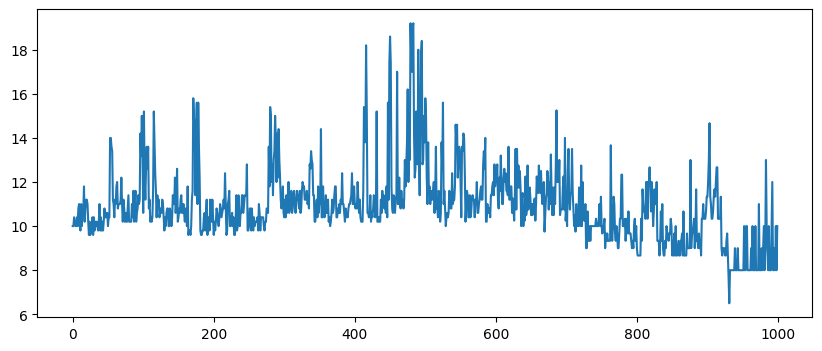

In [ ]:
_, axs = plt.subplots(1, 1, figsize=(10, 4))
axs.plot(grouped['R'])